In [1]:
import pandas as pd
import numpy as np

## 1. Scegliere i dati

In [2]:
nomefile = './marziani.csv'
data = pd.read_csv(nomefile)
print(data.head()) # per farsi un'idea del contenuto
print(">>colonne: ", data.columns) # per vedere le intestazioni di colonna
print(">>tipi\n",data.dtypes) # per vedere i tipi

  specie colore  n_arti  peso  altezza  larghezza
0  Robby  viola    20.0  3.87    14.77      73.22
1  Robby  viola    27.0  3.15    28.19      88.44
2  Robby  viola    25.0  4.35    12.05      76.74
3  Robby    blu    20.0  3.76     9.90      81.37
4  Robby    blu    28.0  2.86    19.87      84.65
>>colonne:  Index(['specie', 'colore', 'n_arti', 'peso', 'altezza', 'larghezza'], dtype='object')
>>tipi
 specie        object
colore        object
n_arti       float64
peso         float64
altezza      float64
larghezza    float64
dtype: object


## 2. Pulizia e preparazione dei dati

In [6]:
# serve per vedere il numero di valori null per colonne

data.isnull().sum()

specie       0
colore       7
n_arti       6
peso         0
altezza      5
larghezza    3
dtype: int64

In [7]:
# serve per vedere le colonne che hanno valori null e quanti c'è ne sono

cols_with_missing = [col for col in data.columns if data[col].isnull().sum()]
cols_with_missing = (data.isnull().sum())
print(cols_with_missing[cols_with_missing > 0])

colore       7
n_arti       6
altezza      5
larghezza    3
dtype: int64


### Analizzare i dati

In [8]:
print(">>Specie")
print(data.specie.unique()) # quali sono le specie
print(">>Describe")
print(data['specie'].describe()) # quanti campioni ci sono

>>Specie
['Robby' 'Simmy']
>>Describe
count      2000
unique        2
top       Simmy
freq       1000
Name: specie, dtype: object


In [9]:
print(">> Robby\n",data[data['specie'] == 'Robby'].describe())
print(">> Simmy\n",data[data['specie'] == 'Simmy'].describe())

>> Robby
            n_arti         peso     altezza   larghezza
count  999.000000  1000.000000  996.000000  999.000000
mean    24.637638     3.500900   17.518082   84.719429
std      2.899248     0.489139    4.227621   11.456814
min     20.000000     2.130000    3.170000   44.700000
25%     22.000000     3.170000   14.740000   77.045000
50%     25.000000     3.490000   17.330000   84.890000
75%     27.000000     3.830000   20.307500   92.510000
max     29.000000     5.050000   29.400000  117.450000
>> Simmy
            n_arti         peso     altezza   larghezza
count  995.000000  1000.000000  999.000000  998.000000
mean    24.544724     4.490280   32.769620   70.241653
std      2.883513     0.518585    5.755694    3.345319
min     20.000000     2.850000   15.630000   59.440000
25%     22.000000     4.147500   29.070000   68.000000
50%     25.000000     4.505000   32.640000   70.330000
75%     27.000000     4.850000   36.475000   72.610000
max     29.000000     6.110000   49.750000   

In [10]:
for specie in data.specie.unique(): # per ogni specie
    dati = data[data['specie'] == specie]
    print('>>', specie)
    for x in data.columns[1:]: # esclusa la colonna specie
        print(dati[x].describe() ) # per avere statistiche sui dati

>> Robby
count     995
unique      3
top       blu
freq      340
Name: colore, dtype: object
count    999.000000
mean      24.637638
std        2.899248
min       20.000000
25%       22.000000
50%       25.000000
75%       27.000000
max       29.000000
Name: n_arti, dtype: float64
count    1000.000000
mean        3.500900
std         0.489139
min         2.130000
25%         3.170000
50%         3.490000
75%         3.830000
max         5.050000
Name: peso, dtype: float64
count    996.000000
mean      17.518082
std        4.227621
min        3.170000
25%       14.740000
50%       17.330000
75%       20.307500
max       29.400000
Name: altezza, dtype: float64
count    999.000000
mean      84.719429
std       11.456814
min       44.700000
25%       77.045000
50%       84.890000
75%       92.510000
max      117.450000
Name: larghezza, dtype: float64
>> Simmy
count       998
unique        3
top       rosso
freq        339
Name: colore, dtype: object
count    995.000000
mean      24.544724


### Rendiamo numeriche le label

In [16]:
# Ad ogni colore associo un numero

colori = np.sort(data['colore'].dropna().unique()) # colori in ordine alfabetico

print(colori)

d = data.copy() # fa una copia dei dati originali
for k in range (len(colori)): # sostituisce ogni colore con l'indice
    d['colore'].replace(colori[k], k, inplace = True)

print(d.head())

['blu' 'rosso' 'viola']
  specie  colore  n_arti  peso  altezza  larghezza
0  Robby     2.0    20.0  3.87    14.77      73.22
1  Robby     2.0    27.0  3.15    28.19      88.44
2  Robby     2.0    25.0  4.35    12.05      76.74
3  Robby     0.0    20.0  3.76     9.90      81.37
4  Robby     0.0    28.0  2.86    19.87      84.65


In [17]:
print(data['colore'].unique()) # senza eliminare i dati mancanti

['viola' 'blu' 'rosso' nan]


### Rappresentazione dei dati

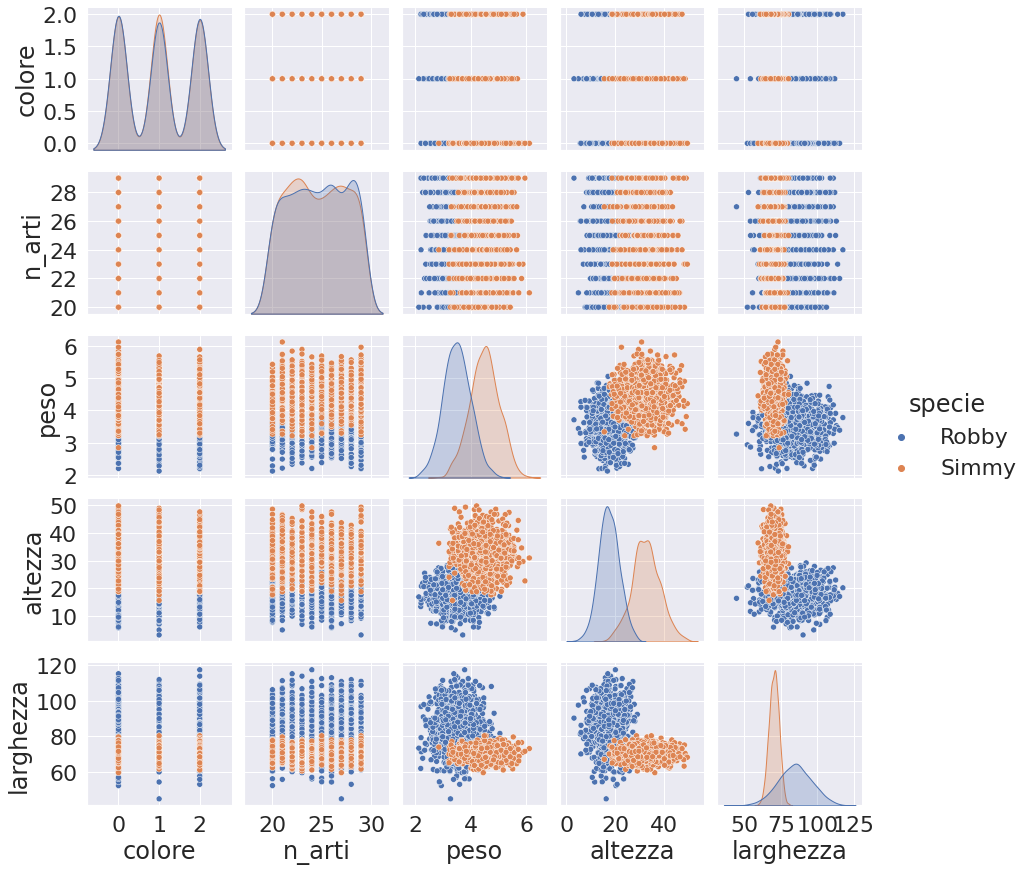

In [18]:
import seaborn as sns

sns.set_theme(font_scale=2) # raddoppia la dimensione di tutti i caratteri
sns.pairplot(d, hue='specie', dropna=True) #diag_kind="hist"
sns.set() # reimposta i valori di default

### Eliminiamo i dati mancanti

In [19]:
# Colonne con dati mancanti
cols_with_missing = [col for col in d.columns if d[col].isnull().sum()]
print(cols_with_missing)

# caratteristiche scelte per la classificazione
cols_selected = ['peso','altezza', 'larghezza']

# si eliminano le righe con dati mancanti solo nelle colonne selezionate
d = data.dropna(axis='index', subset = cols_selected)
print(d.shape)

# Colonne rimanenti con dati mancanti
print([col for col in d.columns if d[col].isnull().sum()])

['colore', 'n_arti', 'altezza', 'larghezza']
(1992, 6)
['colore', 'n_arti']


### Suddividiamo il dataframe negli insiemi X e y , tenendo le caratteristiche scelte

In [21]:
X = d[cols_selected] #['peso','altezza','larghezza']
y = d['specie']
print(X.head())
print(y.head())

   peso  altezza  larghezza
0  3.87    14.77      73.22
1  3.15    28.19      88.44
2  4.35    12.05      76.74
3  3.76     9.90      81.37
4  2.86    19.87      84.65
0    Robby
1    Robby
2    Robby
3    Robby
4    Robby
Name: specie, dtype: object


## 3. Suddividere i dati in insieme di training e di test TRAIN_TEST_SPLIT

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

print(X_train.head())
print("Numero di campioni in X train: ",X_train.shape[0])
print(y_train.value_counts()) # quanti valori per ogni specie
print(y_train.head())

      peso  altezza  larghezza
1853  4.58    29.13      70.59
486   3.93    25.37      95.30
846   3.95    27.27      73.86
376   3.01    21.95      74.95
580   3.17    12.02      76.47
Numero di campioni in X train:  1394
Simmy    710
Robby    684
Name: specie, dtype: int64
1853    Simmy
486     Robby
846     Robby
376     Robby
580     Robby
Name: specie, dtype: object


### Standarizzazione

In [25]:
# per visualizzare i dati con solo 3 decimali
pd.options.display.float_format = '{:.3f}'.format

m = X_train.mean()
print(f">>Media: \n{m}")
s = X_train.std()
print(f">>Deviazione standard: \n{s}")

X_train_std = ((X_train-m)/s) # normalizzazione del training set
print(f">>X train Normalizzato \n {X_train_std.describe()}")

>>Media: 
peso         3.995
altezza     25.276
larghezza   77.389
dtype: float64
>>Deviazione standard: 
peso         0.708
altezza      9.173
larghezza   10.984
dtype: float64
>>X train Normalizzato 
           peso  altezza  larghezza
count 1394.000 1394.000   1394.000
mean    -0.000   -0.000     -0.000
std      1.000    1.000      1.000
min     -2.536   -2.410     -2.297
25%     -0.742   -0.863     -0.724
50%     -0.007   -0.117     -0.360
75%      0.755    0.846      0.667
max      2.988    2.572      3.444


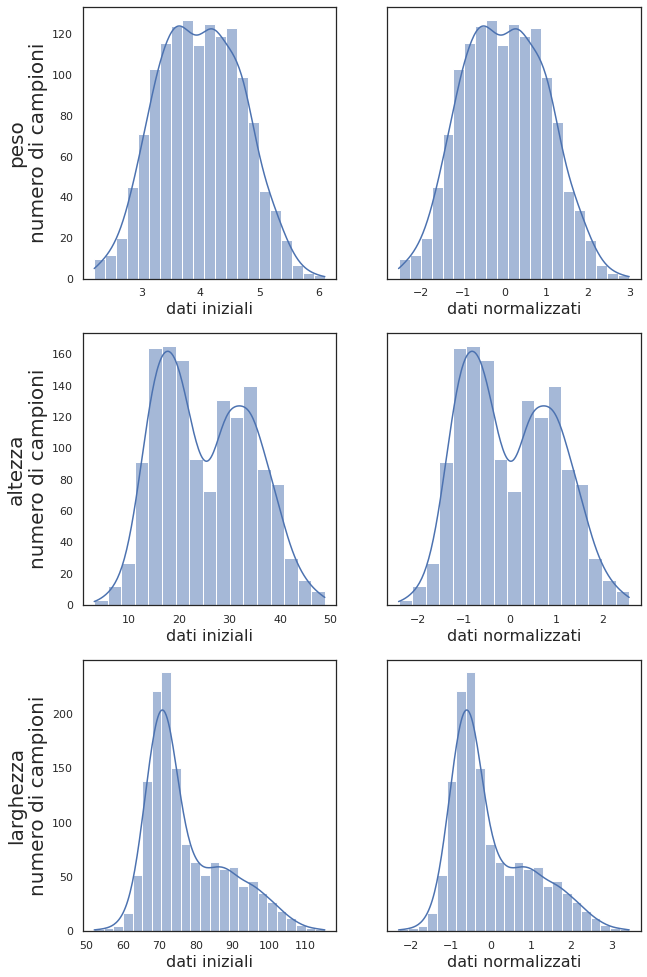

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("white") # imposta lo sfondo bianco senza griglia
fig, axes = plt.subplots(3, 2, figsize=(10,17), sharey='row') # condivide asse y per ogni righe

for i, ax in enumerate(axes):
    col = cols_selected[i] # feature corrente
    # etichette dell'asse x e dell'asse y
    ax[0].set_xlabel('dati iniziali', fontsize=16);
    ax[1].set_xlabel('dati normalizzati', fontsize=16)
    ax[0].set_ylabel(col+"\nnumero di campioni", fontsize=20); # asse y condiviso
    # grafici della colonna corrente
    sns.histplot(ax=ax[0], x=X_train[col], kde=True)
    sns.histplot(ax=ax[1], x=X_train_std[col], kde=True)
sns.set() # reimposta i valori di default

In [28]:
X_test_std = ((X_test-m)/s) # normalizziamo
print(f">>X test Normalizzato \n {X_test_std.describe()}")

pd.options.display.float_format = None # ripristina la visualizzazione di default

>>X test Normalizzato 
              peso     altezza   larghezza
count  598.000000  598.000000  598.000000
mean    -0.001165   -0.047546    0.025733
std      0.988214    0.987773    1.034883
min     -2.635013   -1.968437   -2.975920
25%     -0.741986   -0.876096   -0.718875
50%     -0.014441   -0.175122   -0.339931
75%      0.737825    0.739524    0.701082
max      2.380098    2.668019    3.647053


## 4. Scegliere il modello da utilizzare

In [30]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(100,100), random_state=1, max_iter=300)

## 5. Addestrare il modello FIT

In [31]:
model.fit(X_train_std, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=300, random_state=1)

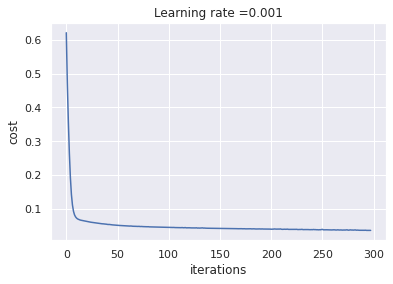

In [32]:
import matplotlib.pyplot as plt
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(model.learning_rate_init))
plt.plot(model.loss_curve_)
plt.show()

## 6. Testare il modello PREDICT

In [33]:
#Predizioni sui dati di training
print("Train")
print(y_train.values[:5])
print(model.predict(X_train_std[:5]))

#Predizioni sui dati di test
print("Test")
print(y_test.values[:5])
print(model.predict(X_test_std[:5]))

#Predizioni su un caso specifico
caso_std = (([4.8,31.4,70.8]-m)/s) #normalizziamo i dati
print("Caso")
print(model.predict([caso_std]))

Train
['Simmy' 'Robby' 'Robby' 'Robby' 'Robby']
['Simmy' 'Robby' 'Robby' 'Robby' 'Robby']
Test
['Simmy' 'Simmy' 'Robby' 'Robby' 'Simmy']
['Simmy' 'Simmy' 'Robby' 'Robby' 'Simmy']
Caso
['Simmy']


## 7. Valutare il modello e migliorarlo ACCURANCY_SCORE

In [34]:
print("Accuratezza dati di TRAIN: %.3f" % model.score(X_train_std, y_train))

#questo è un metodo alternativo per avere l'accuratezza
predictions = model.predict(X_test_std)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, predictions)
print("Accuratezza dati di TEST: %.3f" % score)

Accuratezza dati di TRAIN: 0.984
Accuratezza dati di TEST: 0.975


### Per i regressori

In [35]:
from sklearn.metrics import mean_absolute_error

predictions = model.predict(X_test_std)
mae = mean_absolute_error(predictions, y_test)
print(mae)

/home/gabriele/Applicazioni/Anaconda3/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


ValueError: Unable to convert array of bytes/strings into decimal numbers with dtype='numeric'